In [1]:
# EE347 HW2
# Problem 3:
# Calculate the Total Harmonic Distortion (IEEE 519.1992) of the following current waveform. 
# Use sufficient terms such that convergence is within 0.20%.
# What waveform does Equation 1 represent? Generate an additive plot of the 
# fundamental and harmonics over two periods of the fundamental. 
# State its shape, peak value and frequency.

import numpy as np
import matplotlib.pyplot as plt
import mpmath as mp
from scipy import fft
pi = np.pi

In [2]:
# define parameters
A = -165.0 / pi     # amplitude of fundamental (A)
f0 = 60             # Hz
T = 2/f0            # seconds simulated
fs = 20000          # Hz sampling freq
ts = 1/fs           # delta t (s)
N = int(T/ts)       # number of samples
t = np.linspace(0,T,N)
num = 18            # number of terms to simulate

In [3]:
# for num - 1 terms:
num_2 = num - 1
n = np.arange(0,num_2)
# setup harmonics array of arrays
harmonic = np.zeros([num_2, N])
# calculate harmonic sinusoids
ih = 0          # sum of harmonic amplitudes
for index in n:
    h = 2*(index+1) - 1     # python index starts from 0
    c = 1/h                 # harmonic coefficient
    harmonic[index] = c * np.sin(2*pi*h*f0*t)
    if index > 0:
        ih_n = mp.power(A/(mp.sqrt(2)*h),2)
        ih = ih + ih_n

In [4]:
# determine THD and convergence
i1_rms = abs(A) / mp.sqrt(2)
ih_rms = mp.sqrt(ih)
THD_2 = ih_rms / i1_rms * 100
print('THD of n-1 terms = %.1f %%' %THD_2)

THD of n-1 terms = 46.8 %


In [5]:
# for num terms:
num_n = num
n = np.arange(0,num_n)
# setup harmonics array of arrays
harmonic = np.zeros([num_n, N])
# calculate harmonic sinusoids
ih = 0          # sum of harmonic amplitudes
for index in n:
    h = 2*(index+1) - 1     # python index starts from 0
    c = 1/h                 # harmonic coefficient
    harmonic[index] = c * np.sin(2*pi*h*f0*t)
    if index > 0:
        ih_n = mp.power(A/(mp.sqrt(2)*h),2)
        ih = ih + ih_n

In [6]:
# determine THD and convergence
i1_rms = abs(A) / mp.sqrt(2)
ih_rms = mp.sqrt(ih)
THD_n = ih_rms / i1_rms * 100
print('THD of n terms = %.1f %%' %THD_n)

THD of n terms = 46.9 %


In [7]:
# determine % convergence between values for THD
conv = abs((THD_n - THD_2)/THD_n) * 100
print("Percent convergence for %d terms is %.2f%%" %(num_n,conv))

Percent convergence for 18 terms is 0.19%


Text(0, 0.5, 'mag')

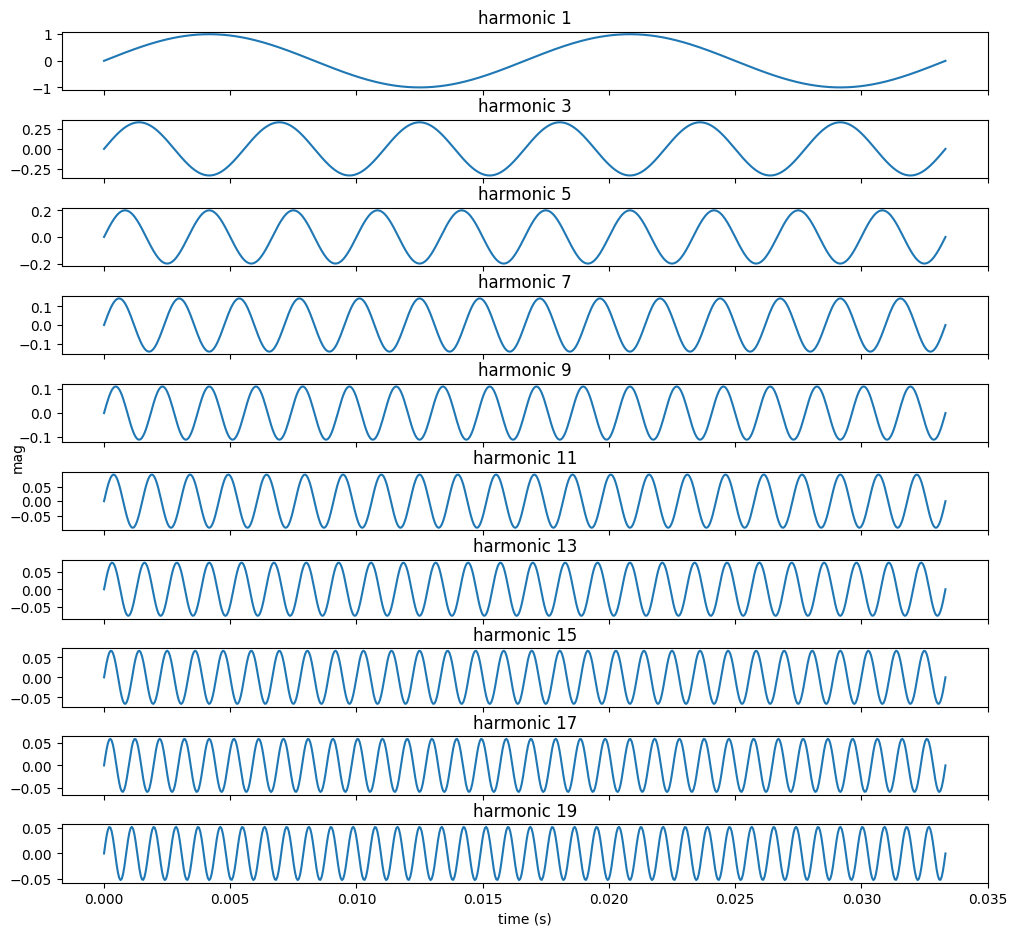

In [8]:
# plot harmonics separately
num_plots = 10
n = np.arange(0,num_plots)
fig, axs = plt.subplots(num_plots,1,figsize=(10, 9), sharex=True)
for row,ax,index in zip(harmonic,axs,n):
    h = 2*(index+1) - 1
    ax.plot(t,row)
    ax.set_title("harmonic %d" %h)

fig.tight_layout(pad=.1)
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("time (s)")
plt.ylabel("mag")

In [9]:
# plot sum of harmonics
n = np.arange(0,num)
wave = np.zeros(N)
for index in n:
    wave = wave + harmonic[index]

# apply amplitude
wave = A * wave

# find max and peak center amplitude
vsum = 0
count = 0
for value in wave:
    val = abs(value)
    if val > 36:
        vsum = vsum + val
        count = count + 1

pk_avg = vsum / count
pk_max = max(wave)
pk_avg_str = "%.1f A" %pk_avg
pk_max_str = "%.1f A" %pk_max

print("average max = %.1f" %pk_avg)
print("peak max = %.1f" %pk_max)

average max = 41.4
peak max = 48.6


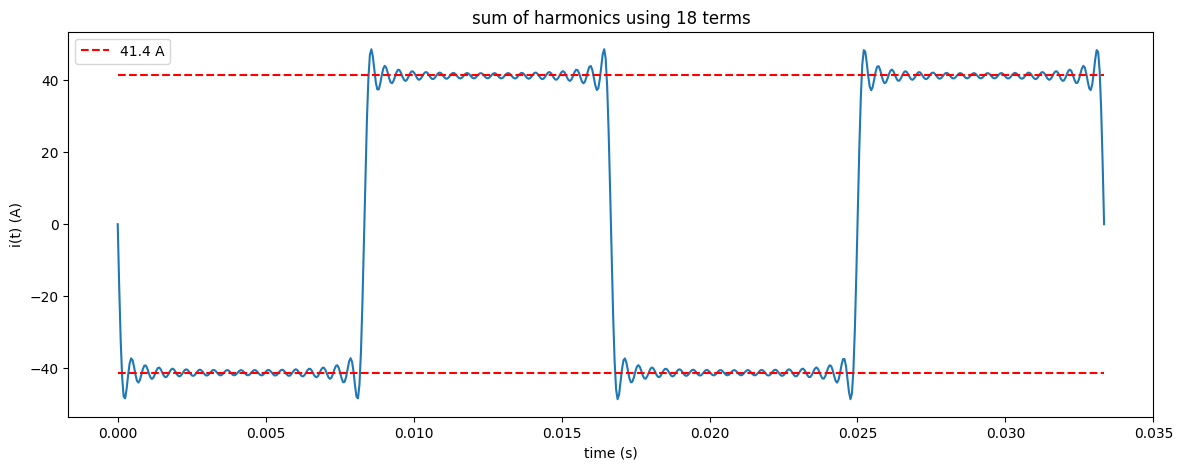

In [10]:
plt.figure(figsize=(14, 5))
plt.plot(t,wave)
#plt.plot(t,A*np.sin(2*pi*f0*t))
plt.hlines([pk_avg,-pk_avg],0,T,colors='r',linestyles='dashed',label=pk_avg_str)
plt.legend()
plt.title('sum of harmonics using %d terms' %num)
plt.xlabel('time (s)')
plt.ylabel('i(t) (A)')
plt.show()

In [11]:
wave_fft = 20*np.log10(abs(fft.fft(wave)))
f = np.linspace(0,fs,N)
print("fundamental freq = %.1f Hz" %f[np.argmax(wave_fft)])

fundamental freq = 60.2 Hz
